In [1]:
import pandas as pd
import seaborn as sns

In [3]:
music = pd.read_csv('top10s.csv',encoding="utf8")

In [4]:
list(music)

['title',
 'artist',
 'topgenre',
 'year',
 'bpm',
 'nrgy',
 'dnce',
 'dB',
 'live',
 'val',
 'dur',
 'acous',
 'spch',
 'pop']

In [5]:
music

,title,artist,topgenre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [7]:
music.corr()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,1.000000,-0.104247,-0.225596,0.079269,-0.126471,-0.136331,-0.122025,-0.215344,0.101725,0.004778,0.241261
bpm,-0.104247,1.000000,0.126170,-0.131301,0.183870,0.081579,0.016021,-0.029359,-0.113257,0.058999,0.018983
nrgy,-0.225596,0.126170,1.000000,0.167209,0.537528,0.186738,0.409577,-0.143610,-0.562287,0.107313,-0.057645
dnce,0.079269,-0.131301,0.167209,1.000000,0.233170,-0.028801,0.501696,-0.176841,-0.240064,-0.028041,0.116054
dB,-0.126471,0.183870,0.537528,0.233170,1.000000,0.081934,0.282922,-0.104723,-0.190401,-0.001110,0.156897
live,-0.136331,0.081579,0.186738,-0.028801,0.081934,1.000000,0.020226,0.098339,-0.098167,0.144103,-0.075749
val,-0.122025,0.016021,0.409577,0.501696,0.282922,0.020226,1.000000,-0.262256,-0.249038,0.122013,0.038953
dur,-0.215344,-0.029359,-0.143610,-0.176841,-0.104723,0.098339,-0.262256,1.000000,0.091802,0.054564,-0.104363
acous,0.101725,-0.113257,-0.562287,-0.240064,-0.190401,-0.098167,-0.249038,0.091802,1.000000,0.002763,0.026704
spch,0.004778,0.058999,0.107313,-0.028041,-0.001110,0.144103,0.122013,0.054564,0.002763,1.000000,-0.041490


In [12]:
pop_music = music[music['topgenre'].str.contains('e pop')]
# pop_music.groupby(['topgenre', 'year'])['year'].count().unstack().fillna(0)
# pd.crosstab(pop_music.topgenre, pop_music.year)
pop_music.pivot_table(index='topgenre', columns='year', aggfunc={'year':len}, fill_value=0)

year                                             
year             2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
topgenre                                                          
baroque pop         0    0    2    0    0    0    0    0    0    0
dance pop          31   38   15   42   27   52   46   31   38    7
french indie pop    0    0    0    0    0    1    0    0    0    0
indie pop           1    0    0    1    0    0    0    0    0    0

<AxesSubplot:xlabel='dnce', ylabel='nrgy'>

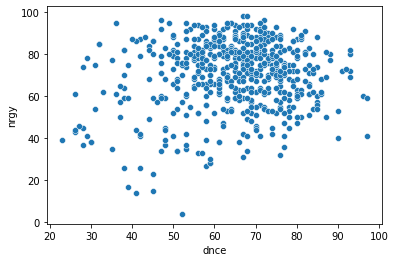

In [13]:
sns.scatterplot(data=music[music['dnce']>0],x='dnce',y='nrgy')

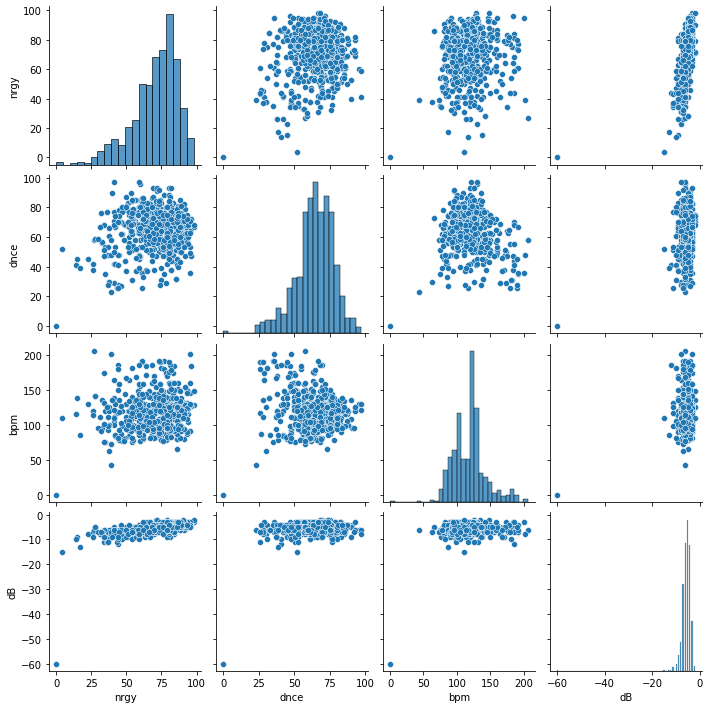

In [14]:
sns.pairplot(music[['nrgy','dnce','bpm','dB']])

<AxesSubplot:>

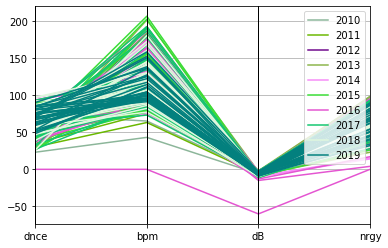

In [15]:
pd.plotting.parallel_coordinates(
    music[['dnce', 'bpm', 'dB', 'nrgy','year']], 'year'
)

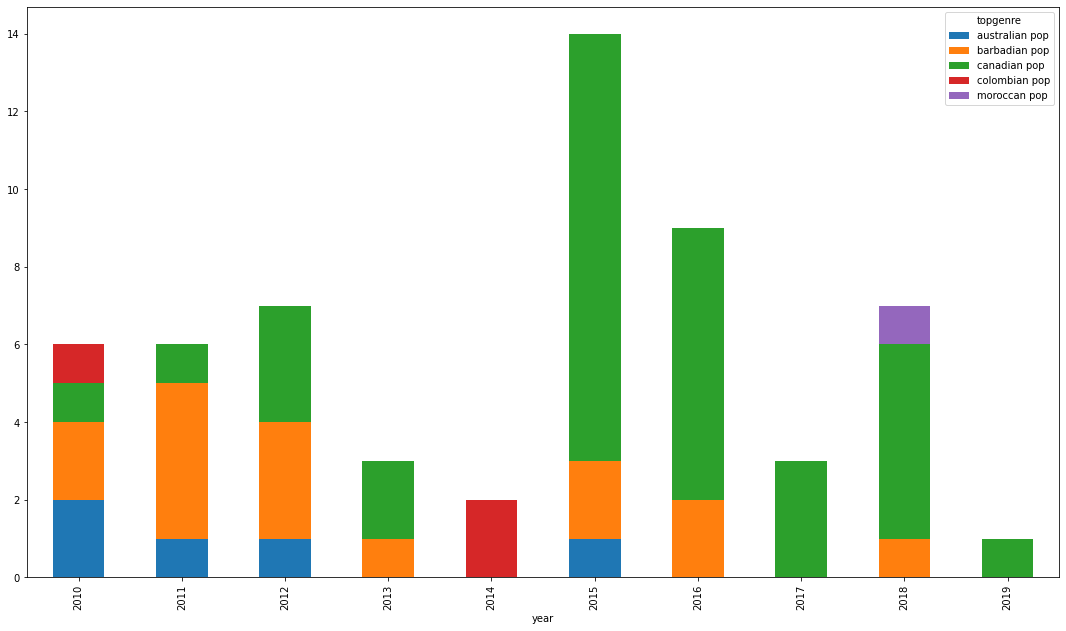

In [17]:
pop_music = music[music['topgenre'].str.contains('n pop')]
# pop_music_group=pop_music.groupby('topgenre')
pop_music_group=pop_music.groupby(['topgenre', 'year'])['year'].count().unstack().fillna(0)
ax = pop_music_group.transpose().plot(kind='bar', stacked=True, figsize=(18.5, 10.5))

In [1]:
### Clustering

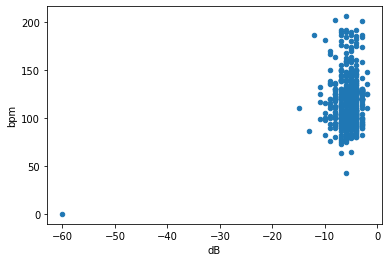

In [13]:
clustering_example=music[['nrgy','dnce','bpm','dB']]
clustering_example.plot(kind='scatter', x='dB', y='bpm')

Dataset1
Cluster 0: 1022
Cluster 1: 1018
Cluster 2: 952
Cluster 3: 1008


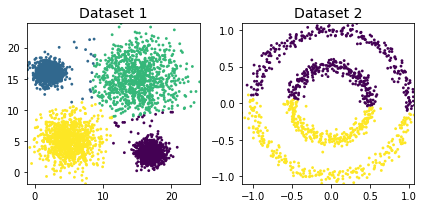

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

# we take the first array as the second array has the cluster labels
dataset2 = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)[0]
# implementing k-means clustering
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset1)
kmeans_dataset2 = cluster.KMeans(n_clusters=2, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset2)
print('Dataset1')
print(*["Cluster "+str(i)+": "+ str(sum(kmeans_dataset1==i)) for i in range(4)], sep='\n')

# plot clustering output on the two datasets
def cluster_plots(set1, set2, colours1 = 'gray', colours2 = 'gray', 
                  title1 = 'Dataset 1',  title2 = 'Dataset 2'):
    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(6, 3)
    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1],s=8,lw=0,c= colours1)
    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1],s=8,lw=0,c=colours2)
    fig.tight_layout()
    plt.show()

cluster_plots(dataset1, dataset2, 
              kmeans_dataset1, kmeans_dataset2)


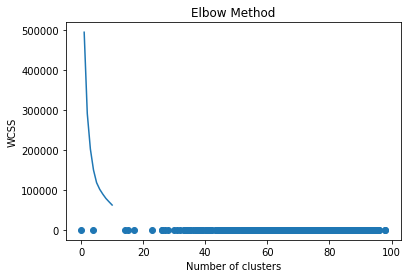

In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
# X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
clustering_example=music[['nrgy','bpm']].drop_duplicates()
X=clustering_example
plt.scatter(X['nrgy'], X['bpm'])
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


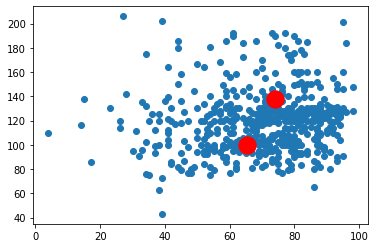

In [57]:
X=X[X['nrgy']>0]
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X['nrgy'], X['bpm'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()


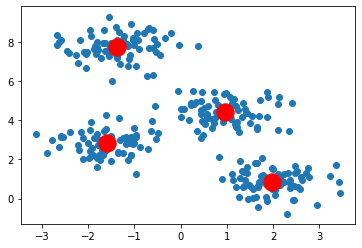

In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# plt.scatter(X[:,0], X[:,1])
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()


In [69]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, kmeans.labels_)
print("Accuracy score is", acc)


Accuracy score is 0.0


Accuracy score is 0.49


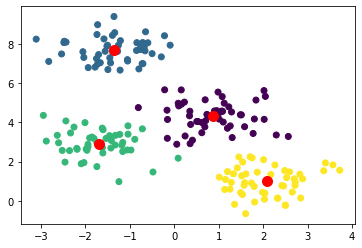

In [84]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
# print(X[:10],y[:10])

model = KMeans(4)
model.fit(X)
# print(model.cluster_centers_)
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centres

from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)


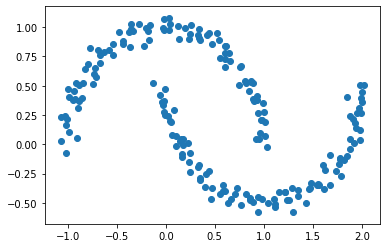

In [85]:
from sklearn.datasets import make_moons
X,y = make_moons(200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1]);

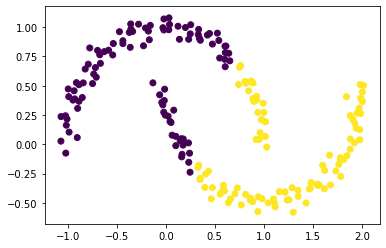

In [81]:
model=KMeans(2)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

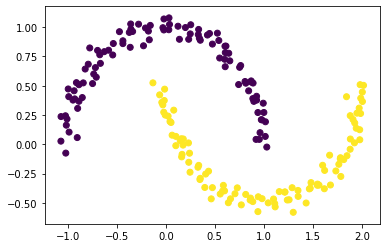

In [82]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);